## Dataset [Shoulder Implant X-Ray Manufacturer Classification Data Set](https://archive.ics.uci.edu/ml/datasets/Shoulder+Implant+X-Ray+Manufacturer+Classification)

##Data preprocessing

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip

--2025-01-27 17:34:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00517/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]   6.01M  1.17MB/s    in 7.8s    

2025-01-27 17:34:35 (787 KB/s) - ‘data.zip’ saved [6306316]



In [ ]:
!unzip data.zip

Archive:  /content/data.zip
   creating: data/
  inflating: data/Tornier.53.jpg     
  inflating: data/Cofield.61.jpg     
  inflating: data/Tornier.60.jpg     
  inflating: data/Depuy.15.jpg       
  inflating: data/Depuy.147.jpg      
  inflating: data/Zimmer.123.jpg     
  inflating: data/Zimmer.134.jpg     
  inflating: data/Cofield.40.jpg     
  inflating: data/Cofield.8.jpg      
  inflating: data/Depuy.42.jpg       
  inflating: data/Depuy.295.jpg      
  inflating: data/Tornier.45.jpg     
  inflating: data/Depuy.123.jpg      
  inflating: data/Zimmer.34.jpg      
  inflating: data/Depuy.166.jpg      
  inflating: data/Depuy.249.jpg      
  inflating: data/Tornier.59.jpg     
  inflating: data/Cofield.52.jpg     
  inflating: data/Zimmer.86.jpg      
  inflating: data/Zimmer.8.jpg       
  inflating: data/Depuy.280.jpg      
  inflating: data/Depuy.264.jpg      
  inflating: data/Depuy.36.jpg       
  inflating: data/Depuy.180.jpg      
  inflating: data/Depuy.140.jpg      
  i

In [3]:
import os
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.applications.resnet_v2 import ResNet50V2
from keras.layers import Dropout, Dense, Input
from keras.models import Model, load_model
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
!ls data | wc -l

597


In [5]:
dir = 'data'

In [6]:
Cofield_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Cofield' in file_name]
Depuy_filepaths = [dir + '/'+ file_name for file_name in os.listdir(dir) if 'Depuy' in file_name]
Tornier_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Tornier' in file_name]
Zimmer_filepaths = [dir + '/' + file_name for file_name in os.listdir(dir) if 'Zimmer' in file_name]

In [7]:
print(Cofield_filepaths)
print(Depuy_filepaths)
print(Tornier_filepaths)
print(Zimmer_filepaths)

['data/Cofield.67.jpg', 'data/Cofield.58.jpg', 'data/Cofield.5.jpg', 'data/Cofield.6.jpg', 'data/Cofield.21.jpg', 'data/Cofield.49.jpg', 'data/Cofield.36.jpg', 'data/Cofield.37.jpg', 'data/Cofield.40.jpg', 'data/Cofield.18.jpg', 'data/Cofield.57.jpg', 'data/Cofield.43.jpg', 'data/Cofield.24.jpg', 'data/Cofield.26.jpg', 'data/Cofield.8.jpg', 'data/Cofield.13.jpg', 'data/Cofield.66.jpg', 'data/Cofield.25.jpg', 'data/Cofield.9.jpg', 'data/Cofield.71.jpg', 'data/Cofield.2.jpg', 'data/Cofield.80.jpg', 'data/Cofield.59.jpg', 'data/Cofield.29.jpg', 'data/Cofield.10.jpg', 'data/Cofield.12.jpg', 'data/Cofield.55.jpg', 'data/Cofield.30.jpg', 'data/Cofield.20.jpg', 'data/Cofield.22.jpg', 'data/Cofield.50.jpg', 'data/Cofield.78.jpg', 'data/Cofield.64.jpg', 'data/Cofield.51.jpg', 'data/Cofield.11.jpg', 'data/Cofield.31.jpg', 'data/Cofield.72.jpg', 'data/Cofield.52.jpg', 'data/Cofield.68.jpg', 'data/Cofield.23.jpg', 'data/Cofield.16.jpg', 'data/Cofield.75.jpg', 'data/Cofield.63.jpg', 'data/Cofield.7

In [8]:
print(len(Cofield_filepaths))
print(len(Depuy_filepaths))
print(len(Tornier_filepaths))
print(len(Zimmer_filepaths))

83
294
71
149


In [9]:
Cofield_filepaths_train = Cofield_filepaths[:int(len(Cofield_filepaths)*0.8)]
Cofield_filepaths_test = Cofield_filepaths[int(len(Cofield_filepaths)*0.8):]
Depuy_filepaths_train = Depuy_filepaths[:int(len(Depuy_filepaths)*0.8)]
Depuy_filepaths_test = Depuy_filepaths[int(len(Depuy_filepaths)*0.8):]
Tornier_filepaths_train = Tornier_filepaths[:int(len(Tornier_filepaths)*0.8)]
Tornier_filepaths_test = Tornier_filepaths[int(len(Tornier_filepaths)*0.8):]
Zimmer_filepaths_train = Zimmer_filepaths[:int(len(Zimmer_filepaths)*0.8)]
Zimmer_filepaths_test = Zimmer_filepaths[int(len(Zimmer_filepaths)*0.8):]

In [10]:
print(len(Cofield_filepaths_train))
print(len((Cofield_filepaths_test)))
print(Cofield_filepaths_train)
print(Cofield_filepaths_test)

66
17
['data/Cofield.67.jpg', 'data/Cofield.58.jpg', 'data/Cofield.5.jpg', 'data/Cofield.6.jpg', 'data/Cofield.21.jpg', 'data/Cofield.49.jpg', 'data/Cofield.36.jpg', 'data/Cofield.37.jpg', 'data/Cofield.40.jpg', 'data/Cofield.18.jpg', 'data/Cofield.57.jpg', 'data/Cofield.43.jpg', 'data/Cofield.24.jpg', 'data/Cofield.26.jpg', 'data/Cofield.8.jpg', 'data/Cofield.13.jpg', 'data/Cofield.66.jpg', 'data/Cofield.25.jpg', 'data/Cofield.9.jpg', 'data/Cofield.71.jpg', 'data/Cofield.2.jpg', 'data/Cofield.80.jpg', 'data/Cofield.59.jpg', 'data/Cofield.29.jpg', 'data/Cofield.10.jpg', 'data/Cofield.12.jpg', 'data/Cofield.55.jpg', 'data/Cofield.30.jpg', 'data/Cofield.20.jpg', 'data/Cofield.22.jpg', 'data/Cofield.50.jpg', 'data/Cofield.78.jpg', 'data/Cofield.64.jpg', 'data/Cofield.51.jpg', 'data/Cofield.11.jpg', 'data/Cofield.31.jpg', 'data/Cofield.72.jpg', 'data/Cofield.52.jpg', 'data/Cofield.68.jpg', 'data/Cofield.23.jpg', 'data/Cofield.16.jpg', 'data/Cofield.75.jpg', 'data/Cofield.63.jpg', 'data/Cof

In [9]:
print(len(Depuy_filepaths_train))
print(len((Depuy_filepaths_test)))
print(Depuy_filepaths_train)
print(Depuy_filepaths_test)

235
59
['data/Depuy.132.jpg', 'data/Depuy.195.jpg', 'data/Depuy.137.jpg', 'data/Depuy.213.jpg', 'data/Depuy.148.jpg', 'data/Depuy.282.jpg', 'data/Depuy.184.jpg', 'data/Depuy.122.jpg', 'data/Depuy.100.jpg', 'data/Depuy.250.jpg', 'data/Depuy.131.jpg', 'data/Depuy.238.jpg', 'data/Depuy.40.jpg', 'data/Depuy.233.jpg', 'data/Depuy.53.jpg', 'data/Depuy.160.jpg', 'data/Depuy.109.jpg', 'data/Depuy.44.jpg', 'data/Depuy.260.jpg', 'data/Depuy.3.jpg', 'data/Depuy.7.jpg', 'data/Depuy.76.jpg', 'data/Depuy.163.jpg', 'data/Depuy.29.jpg', 'data/Depuy.253.jpg', 'data/Depuy.11.jpg', 'data/Depuy.247.jpg', 'data/Depuy.123.jpg', 'data/Depuy.102.jpg', 'data/Depuy.50.jpg', 'data/Depuy.146.jpg', 'data/Depuy.273.jpg', 'data/Depuy.130.jpg', 'data/Depuy.212.jpg', 'data/Depuy.88.jpg', 'data/Depuy.156.jpg', 'data/Depuy.34.jpg', 'data/Depuy.12.jpg', 'data/Depuy.279.jpg', 'data/Depuy.194.jpg', 'data/Depuy.259.jpg', 'data/Depuy.60.jpg', 'data/Depuy.189.jpg', 'data/Depuy.192.jpg', 'data/Depuy.230.jpg', 'data/Depuy.24.jp

In [10]:
print(len(Tornier_filepaths_train))
print(len((Tornier_filepaths_test)))
print(Tornier_filepaths_train)
print(Tornier_filepaths_test)

56
15
['data/Tornier.45.jpg', 'data/Tornier.9.jpg', 'data/Tornier.66.jpg', 'data/Tornier.41.jpg', 'data/Tornier.22.jpg', 'data/Tornier.62.jpg', 'data/Tornier.48.jpg', 'data/Tornier.5.jpg', 'data/Tornier.11.jpg', 'data/Tornier.60.jpg', 'data/Tornier.1.jpg', 'data/Tornier.16.jpg', 'data/Tornier.37.jpg', 'data/Tornier.59.jpg', 'data/Tornier.17.jpg', 'data/Tornier.26.jpg', 'data/Tornier.64.jpg', 'data/Tornier.6.jpg', 'data/Tornier.25.jpg', 'data/Tornier.39.jpg', 'data/Tornier.58.jpg', 'data/Tornier.35.jpg', 'data/Tornier.53.jpg', 'data/Tornier.40.jpg', 'data/Tornier.61.jpg', 'data/Tornier.70.jpg', 'data/Tornier.43.jpg', 'data/Tornier.34.jpg', 'data/Tornier.68.jpg', 'data/Tornier.29.jpg', 'data/Tornier.14.jpg', 'data/Tornier.31.jpg', 'data/Tornier.50.jpg', 'data/Tornier.44.jpg', 'data/Tornier.10.jpg', 'data/Tornier.65.jpg', 'data/Tornier.46.jpg', 'data/Tornier.52.jpg', 'data/Tornier.33.jpg', 'data/Tornier.32.jpg', 'data/Tornier.8.jpg', 'data/Tornier.54.jpg', 'data/Tornier.57.jpg', 'data/Tor

In [11]:
print(len(Zimmer_filepaths_train))
print(len((Zimmer_filepaths_test)))
print(Zimmer_filepaths_train)
print(Zimmer_filepaths_test)

119
30
['data/Zimmer.80.jpg', 'data/Zimmer.85.jpg', 'data/Zimmer.10.jpg', 'data/Zimmer.73.jpg', 'data/Zimmer.138.jpg', 'data/Zimmer.47.jpg', 'data/Zimmer.12.jpg', 'data/Zimmer.28.jpg', 'data/Zimmer.61.jpg', 'data/Zimmer.97.jpg', 'data/Zimmer.91.jpg', 'data/Zimmer.139.jpg', 'data/Zimmer.45.jpg', 'data/Zimmer.102.jpg', 'data/Zimmer.133.jpg', 'data/Zimmer.145.jpg', 'data/Zimmer.66.jpg', 'data/Zimmer.108.jpg', 'data/Zimmer.100.jpg', 'data/Zimmer.34.jpg', 'data/Zimmer.64.jpg', 'data/Zimmer.75.jpg', 'data/Zimmer.22.jpg', 'data/Zimmer.101.jpg', 'data/Zimmer.96.jpg', 'data/Zimmer.131.jpg', 'data/Zimmer.146.jpg', 'data/Zimmer.31.jpg', 'data/Zimmer.147.jpg', 'data/Zimmer.3.jpg', 'data/Zimmer.6.jpg', 'data/Zimmer.48.jpg', 'data/Zimmer.82.jpg', 'data/Zimmer.151.jpg', 'data/Zimmer.103.jpg', 'data/Zimmer.122.jpg', 'data/Zimmer.39.jpg', 'data/Zimmer.77.jpg', 'data/Zimmer.29.jpg', 'data/Zimmer.26.jpg', 'data/Zimmer.7.jpg', 'data/Zimmer.46.jpg', 'data/Zimmer.43.jpg', 'data/Zimmer.33.jpg', 'data/Zimmer.

In [11]:
Train_data_filepaths = Cofield_filepaths_train + Depuy_filepaths_train + Tornier_filepaths_train + Zimmer_filepaths_train
Test_data_filepaths = Cofield_filepaths_test + Depuy_filepaths_test + Tornier_filepaths_test + Zimmer_filepaths_test
print(len(Train_data_filepaths))
print(len(Test_data_filepaths))

476
121


In [12]:
Train_data_label = []
for filepath in Train_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[1]
    Train_data_label.append(label)

In [15]:
print(len(Train_data_label))
print(Train_data_label)

476
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy',

In [13]:
Test_data_label = []
for filepath in Test_data_filepaths:
    label = filepath.split('.')[0].rsplit('/')[1]
    Test_data_label.append(label)

In [19]:
print(len(Test_data_label))
print(Test_data_label)

121
['Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Cofield', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Depuy', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Tornier', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Zimmer', 'Z

In [14]:
Train_df = pd.DataFrame({'Train_data_filepaths':Train_data_filepaths,'Train_data_label':Train_data_label})
Train_df

,Train_data_filepaths,Train_data_label
0,data/Cofield.67.jpg,Cofield
1,data/Cofield.58.jpg,Cofield
2,data/Cofield.5.jpg,Cofield
3,data/Cofield.6.jpg,Cofield
4,data/Cofield.21.jpg,Cofield
...,...,...
471,data/Zimmer.27.jpg,Zimmer
472,data/Zimmer.119.jpg,Zimmer
473,data/Zimmer.1.jpg,Zimmer
474,data/Zimmer.113.jpg,Zimmer


In [15]:
Test_df = pd.DataFrame({'Test_data_filepaths':Test_data_filepaths,'Test_data_label':Test_data_label})
Test_df

,Test_data_filepaths,Test_data_label
0,data/Cofield.45.jpg,Cofield
1,data/Cofield.60.jpg,Cofield
2,data/Cofield.76.jpg,Cofield
3,data/Cofield.1.jpg,Cofield
4,data/Cofield.27.jpg,Cofield
...,...,...
116,data/Zimmer.44.jpg,Zimmer
117,data/Zimmer.8.jpg,Zimmer
118,data/Zimmer.57.jpg,Zimmer
119,data/Zimmer.98.jpg,Zimmer


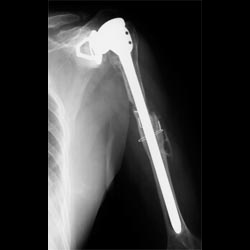

In [ ]:
PIL.Image.open(str(Train_data_filepaths[0]))

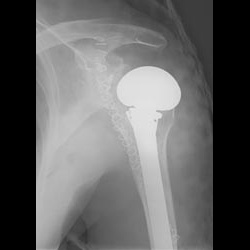

In [ ]:
PIL.Image.open(str(Train_data_filepaths[1]))

In [20]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Train_df,
    x_col='Train_data_filepaths',
    y_col='Train_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123,subset='training')

Found 476 validated image filenames belonging to 4 classes.


In [32]:
print(Train_df.head())

  Train_data_filepaths Train_data_label
0  data/Cofield.67.jpg          Cofield
1  data/Cofield.58.jpg          Cofield
2   data/Cofield.5.jpg          Cofield
3   data/Cofield.6.jpg          Cofield
4  data/Cofield.21.jpg          Cofield


In [21]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.).flow_from_dataframe(
    dataframe=Test_df,
    x_col='Test_data_filepaths',
    y_col='Test_data_label',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=123)

Found 121 validated image filenames belonging to 4 classes.


In [22]:
class_dict = train_generator.class_indices
class_dict
key_list = list(class_dict.keys())
value_list = list(class_dict.values())

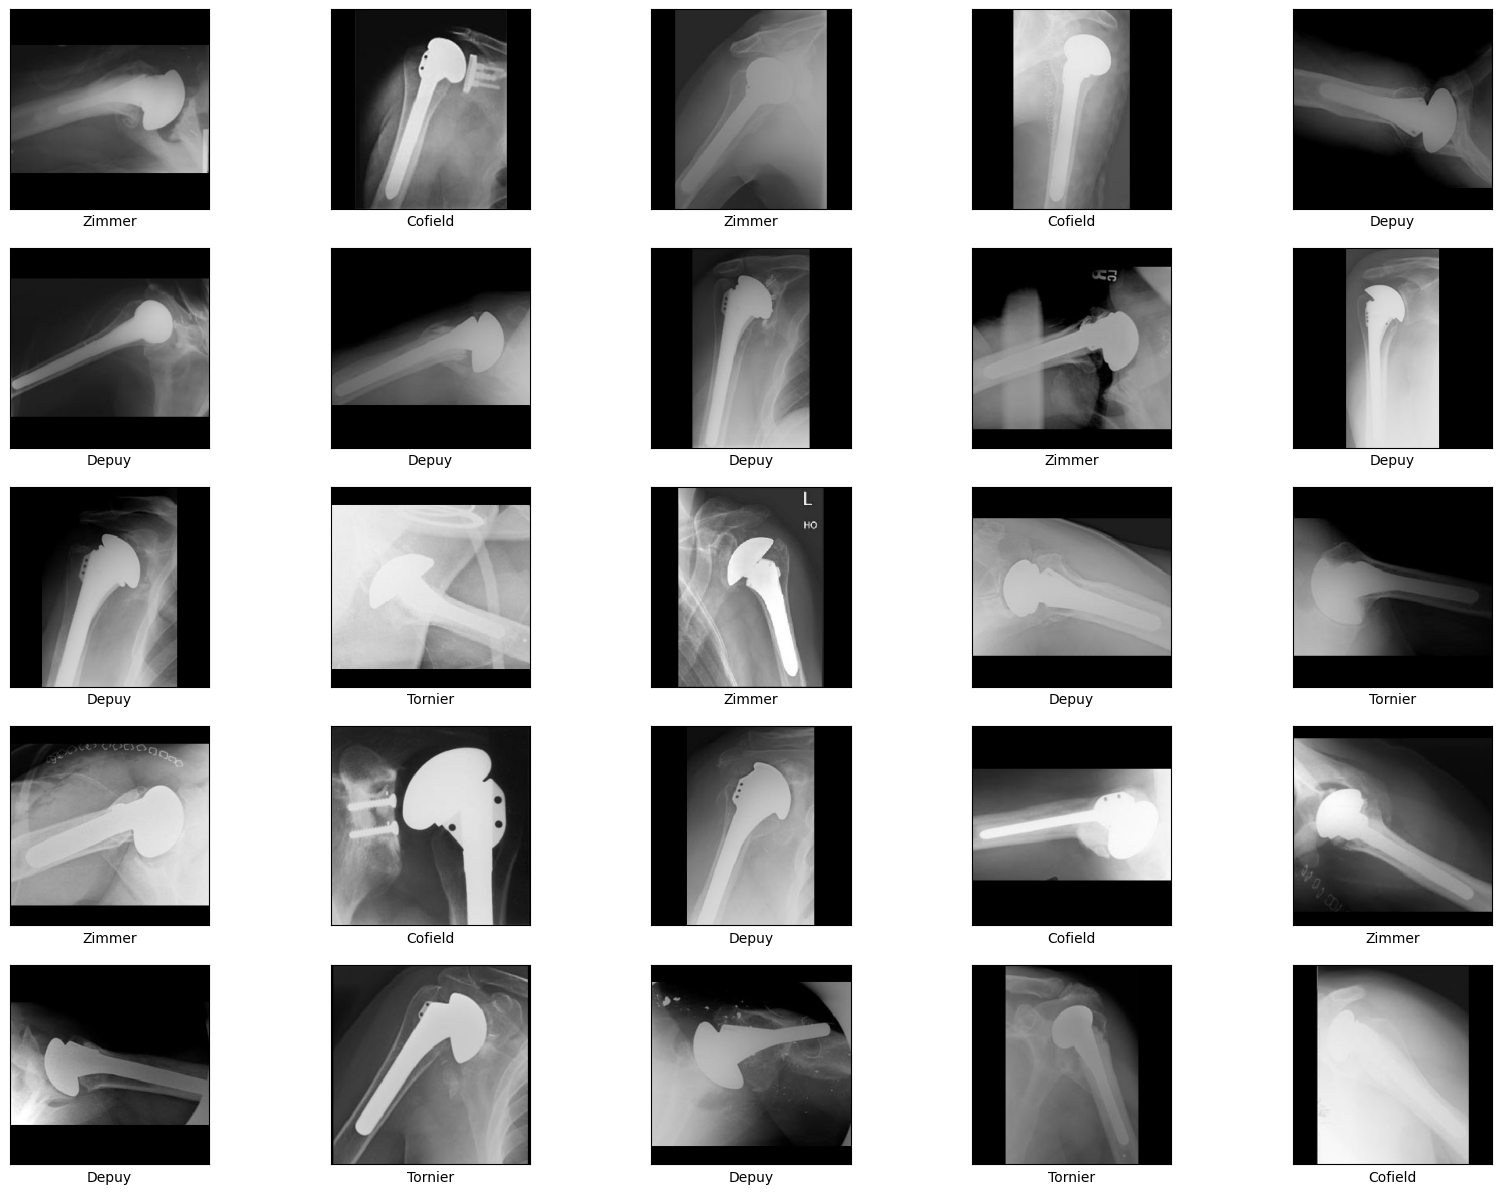

In [24]:
plt.figure(figsize=(20, 15))
images, encoded_labels  = next(train_generator)
labels = np.argmax(encoded_labels,axis =1)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    plt.xlabel(key_list[labels[i]])
plt.show()

In [25]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32, 4)


##Xray Manufacturer Classification using Convolutional Neural Networks(CNN)

In [26]:
num_classes = len(class_dict)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/home/ahmad/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,412,836 (32.09 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
epochs = 120 #######################
history = model.fit(train_generator,epochs=epochs)

Epoch 1/120


/home/ahmad/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-02-03 23:05:45.504384: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2025-02-03 23:05:46.901414: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.


 1/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.2812 - loss: 1.3863

2025-02-03 23:05:47.235304: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.
2025-02-03 23:05:48.403010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.


 2/15 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3281 - loss: 1.3819

2025-02-03 23:05:48.757819: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 134217728 exceeds 10% of free system memory.


15/15 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.4523 - loss: 1.2905
Epoch 2/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4839 - loss: 1.2605
Epoch 3/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.4907 - loss: 1.2436
Epoch 4/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4888 - loss: 1.2359
Epoch 5/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4759 - loss: 1.2583
Epoch 6/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5065 - loss: 1.2088
Epoch 7/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4762 - loss: 1.2495
Epoch 8/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5066 - loss: 1.2186
Epoch 9/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4807 - loss: 1.2463
Epoch 10/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4758 - loss: 1.2436
Epoch 11/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4625 - loss: 1.2559
Epoch 12/120
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5034 - lo

KeyboardInterrupt: 

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                 

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 153ms/step - loss: 1.3864 - accuracy: 0.2479


[1.3863646984100342, 0.24793387949466705]

In [ ]:
model.predict(test_generator)

In [ ]:
epochs = 120
history = model.fit(train_generator,epochs=epochs)

Epoch 1/20
15/15 [==============================] - 2s 104ms/step - loss: 1.3067 - accuracy: 0.4664
Epoch 2/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2430 - accuracy: 0.4937
Epoch 3/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2332 - accuracy: 0.4937
Epoch 4/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2377 - accuracy: 0.4937
Epoch 5/20
15/15 [==============================] - 2s 97ms/step - loss: 1.2410 - accuracy: 0.4937
Epoch 6/20
15/15 [==============================] - 2s 101ms/step - loss: 1.2278 - accuracy: 0.4937
Epoch 7/20
15/15 [==============================] - 2s 100ms/step - loss: 1.2338 - accuracy: 0.4937
Epoch 8/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2388 - accuracy: 0.4937
Epoch 9/20
15/15 [==============================] - 2s 96ms/step - loss: 1.2309 - accuracy: 0.4937
Epoch 10/20
15/15 [==============================] - 2s 99ms/step - loss: 1.2344 - accuracy: 0.4937
Epoch 

In [30]:
model.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 513ms/step - accuracy: 0.5116 - loss: 1.4488


[1.375396728515625, 0.5289255976676941]

In [31]:
pred = model.predict(test_generator, verbose = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step


In [32]:
pred = [np.argmax(i) for i in pred]
pred

[3,
 1,
 1,
 1,
 1,
 0,
 3,
 2,
 3,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 1,
 3,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [33]:
actual = test_generator.classes
actual

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [35]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.17      0.24      0.20        17
           1       0.52      0.54      0.53        59
           2       0.33      0.20      0.25        15
           3       0.23      0.20      0.21        30

    accuracy                           0.37       121
   macro avg       0.31      0.29      0.30       121
weighted avg       0.37      0.37      0.37       121

